In [1]:
# Required Libraries
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Step 1: Loading Data
train_df = pd.read_csv('hateval2019_en_train.csv')
test_df = pd.read_csv('hateval2019_en_test.csv')
dev_df = pd.read_csv('hateval2019_en_dev.csv')



In [2]:
# Step 2: Data Preprocessing
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove mentions (@username)
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    # Remove hashtags
    text = re.sub(r'#', '', text)
    # Remove non-alphanumeric characters
    text = re.sub(r'[^A-Za-z0-9 ]+', '', text)
    return text.strip().lower()

train_df['clean_text'] = train_df['text'].apply(clean_text)
test_df['clean_text'] = test_df['text'].apply(clean_text)
dev_df['clean_text'] = dev_df['text'].apply(clean_text)



In [3]:

# Step 3: Feature Engineering - Bag of Words (BOW)
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X_train = vectorizer.fit_transform(train_df['clean_text'])
X_test = vectorizer.transform(test_df['clean_text'])
X_dev = vectorizer.transform(dev_df['clean_text'])

y_train = train_df['HS']
y_test = test_df['HS']
y_dev = dev_df['HS']


In [4]:
# Step 4: Model Training and Evaluation
def train_and_evaluate_model(model, model_name):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred_test = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    print(f"{model_name} Test Accuracy: {test_accuracy:.4f}")
    print(f"{model_name} Classification Report on Test Set:\n")
    print(classification_report(y_test, y_pred_test))

    # ROC-AUC on test set
    y_pred_proba_test = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_test)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Confusion Matrix
    print(f"{model_name} Confusion Matrix on Test Set:\n")
    print(confusion_matrix(y_test, y_pred_test))



In [5]:
# Initialize models
models = [
    LogisticRegression(random_state=0),
    RandomForestClassifier(random_state=0),
    SVC(kernel='linear', probability=True, random_state=0)
]

model_names = [
    "Logistic Regression",
    "Random Forest",
    "Support Vector Machine"
]




Training and evaluating Logistic Regression...
Logistic Regression Test Accuracy: 0.5133
Logistic Regression Classification Report on Test Set:

              precision    recall  f1-score   support

           0       0.75      0.24      0.37      1740
           1       0.46      0.89      0.60      1260

    accuracy                           0.51      3000
   macro avg       0.60      0.56      0.49      3000
weighted avg       0.63      0.51      0.47      3000



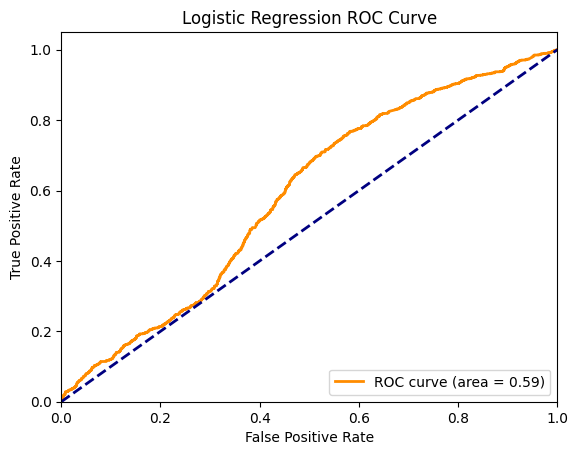

Logistic Regression Confusion Matrix on Test Set:

[[ 422 1318]
 [ 142 1118]]

Training and evaluating Random Forest...
Random Forest Test Accuracy: 0.4683
Random Forest Classification Report on Test Set:

              precision    recall  f1-score   support

           0       0.67      0.16      0.26      1740
           1       0.44      0.89      0.58      1260

    accuracy                           0.47      3000
   macro avg       0.55      0.53      0.42      3000
weighted avg       0.57      0.47      0.40      3000



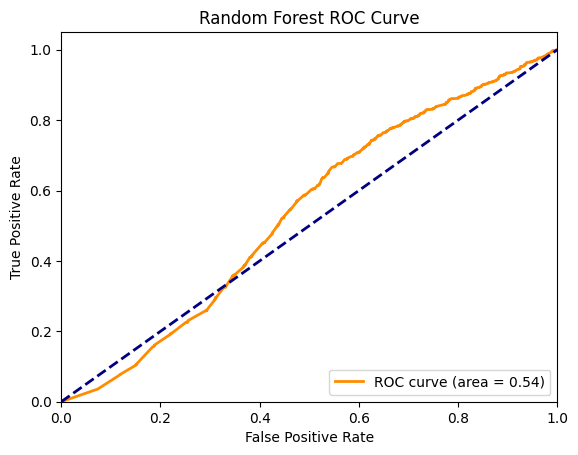

Random Forest Confusion Matrix on Test Set:

[[ 282 1458]
 [ 137 1123]]

Training and evaluating Support Vector Machine...
Support Vector Machine Test Accuracy: 0.4933
Support Vector Machine Classification Report on Test Set:

              precision    recall  f1-score   support

           0       0.73      0.20      0.32      1740
           1       0.45      0.90      0.60      1260

    accuracy                           0.49      3000
   macro avg       0.59      0.55      0.46      3000
weighted avg       0.61      0.49      0.43      3000



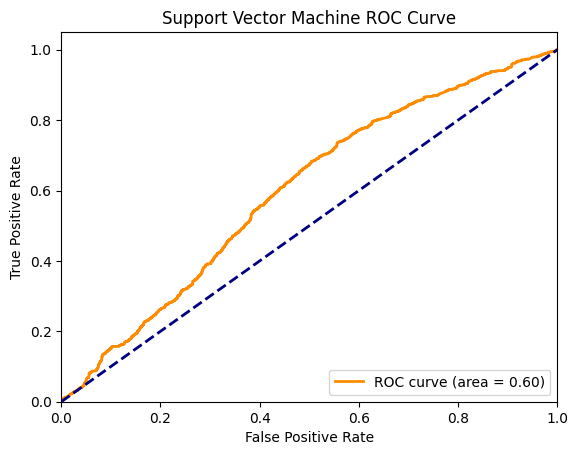

Support Vector Machine Confusion Matrix on Test Set:

[[ 351 1389]
 [ 131 1129]]


In [6]:
# Train and evaluate each model
for model, model_name in zip(models, model_names):
    print(f"\nTraining and evaluating {model_name}...")
    train_and_evaluate_model(model, model_name)